In [1]:
# IMPORT DATA AND PERFORM EXPLORATORY DATA ANALYSIS 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the data
reviews_df = pd.read_csv('amazon_reviews.csv')
reviews_df

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1


In [3]:
# View the DataFrame Information
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3149 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [4]:
# View DataFrame Statistical Summary
reviews_df.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


<Axes: xlabel='rating', ylabel='count'>

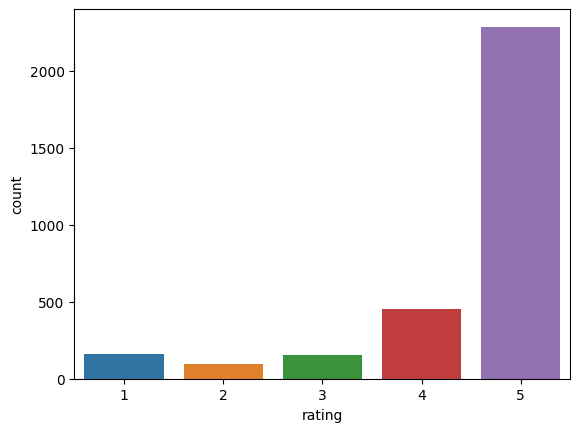

In [5]:
# Plot the count plot for the ratings
sns.countplot(x = reviews_df['rating']) 

In [6]:
sum(reviews_df['verified_reviews'].isnull())

1

In [7]:
reviews_df['verified_reviews']=reviews_df['verified_reviews'].fillna('')

In [9]:
# Let's get the length of the verified_reviews column
reviews_df['length'] = reviews_df['verified_reviews'].apply(len)


In [11]:
reviews_df

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5
...,...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,50
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1,135
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1,441
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1,380


<Axes: ylabel='Frequency'>

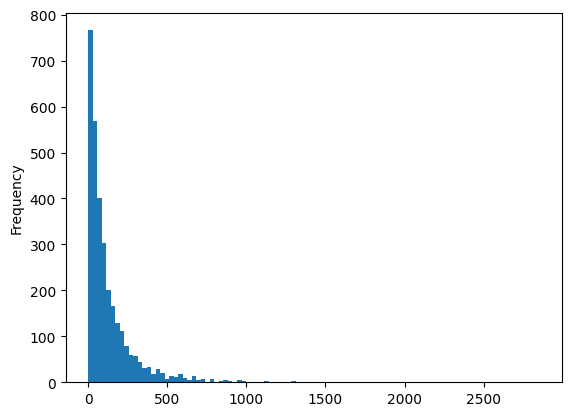

In [13]:
# Plot the histogram for the length
reviews_df['length'].plot(bins=100, kind='hist') 

In [14]:
# Apply the describe method to get statistical summary
reviews_df.describe()

,rating,feedback,length
count,3150.000000,3150.000000,3150.000000
mean,4.463175,0.918413,132.048254
std,1.068506,0.273778,182.100859
min,1.000000,0.000000,0.000000
25%,4.000000,1.000000,30.000000
50%,5.000000,1.000000,74.000000
75%,5.000000,1.000000,165.000000
max,5.000000,1.000000,2851.000000


<Axes: xlabel='feedback', ylabel='count'>

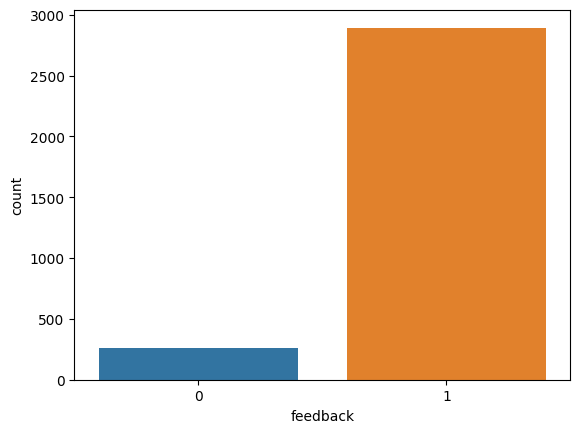

In [15]:
# Plot the countplot for feedback
# Positive ~2800
# Negative ~250
sns.countplot(x = reviews_df['feedback'])

In [49]:
# PLOT WORDCLOUD

# The function performs the following: (1) remove punctuation, (2) remove stopwords (3) returns words in lower case
# to avoid duplication


import string
from wordcloud import WordCloud 
from nltk.corpus import stopwords
from collections import Counter

def message_cleaning(message):
    Test_punc_removed = [char for char in message if char not in string.punctuation]
    Test_punc_removed_join = ' '.join(Test_punc_removed)
    Test_punc_removed_join_clean = [word.lower() for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    return Test_punc_removed_join_clean

In [29]:
positive= reviews_df[reviews_df['feedback'] ==1]

In [24]:
negative= reviews_df[reviews_df['feedback'] ==0]

In [50]:
positive_clean = message_cleaning(positive['verified_reviews'])

In [51]:
negative_clean = message_cleaning(negative['verified_reviews'])

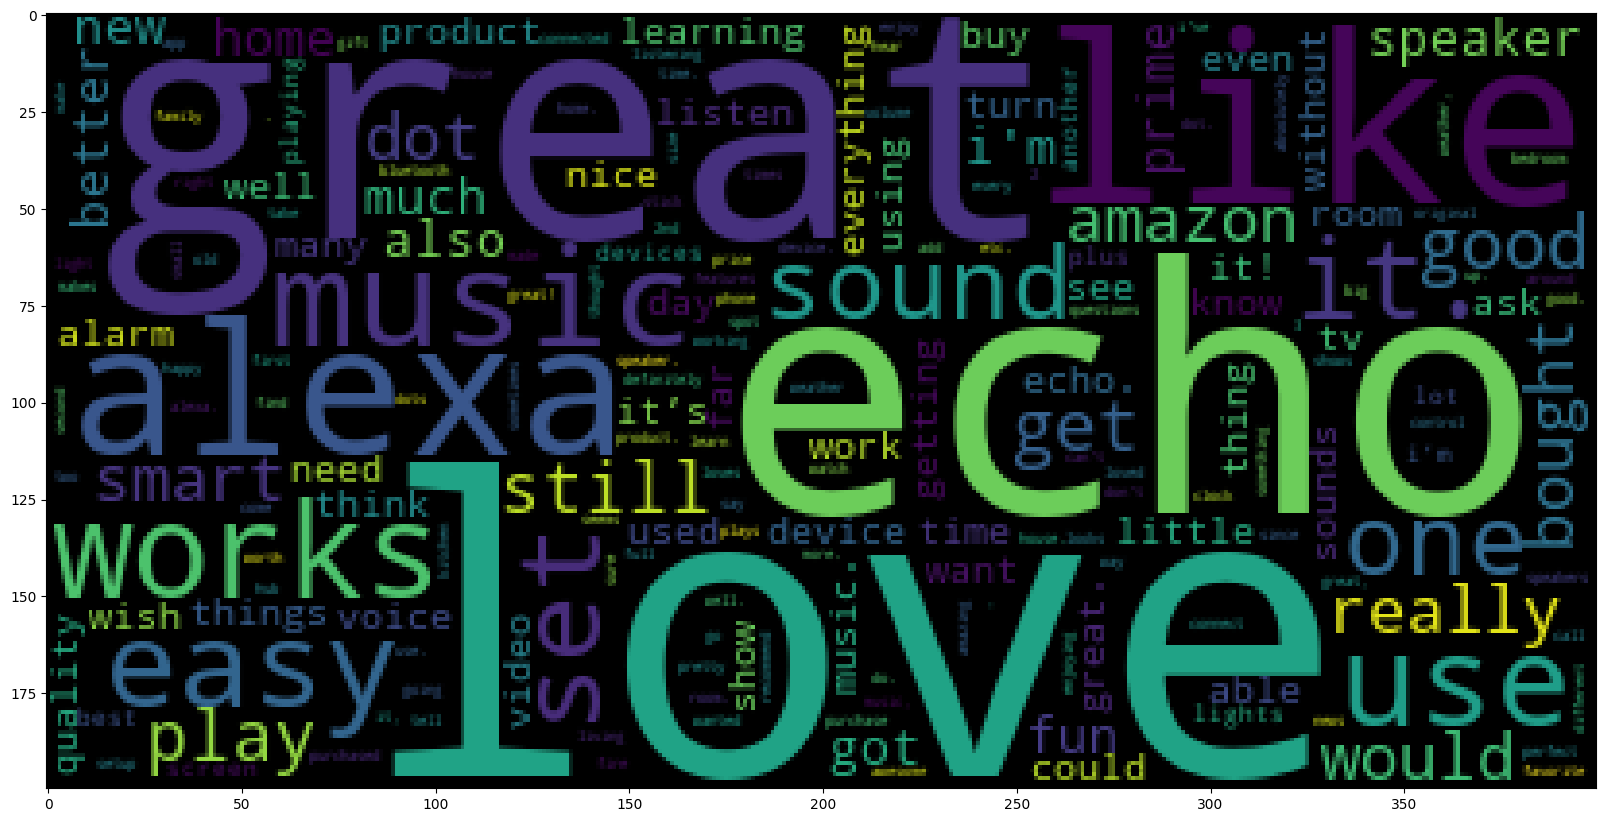

In [52]:
positive_clean_count = Counter(positive_clean)

plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate_from_frequencies(positive_clean_count))

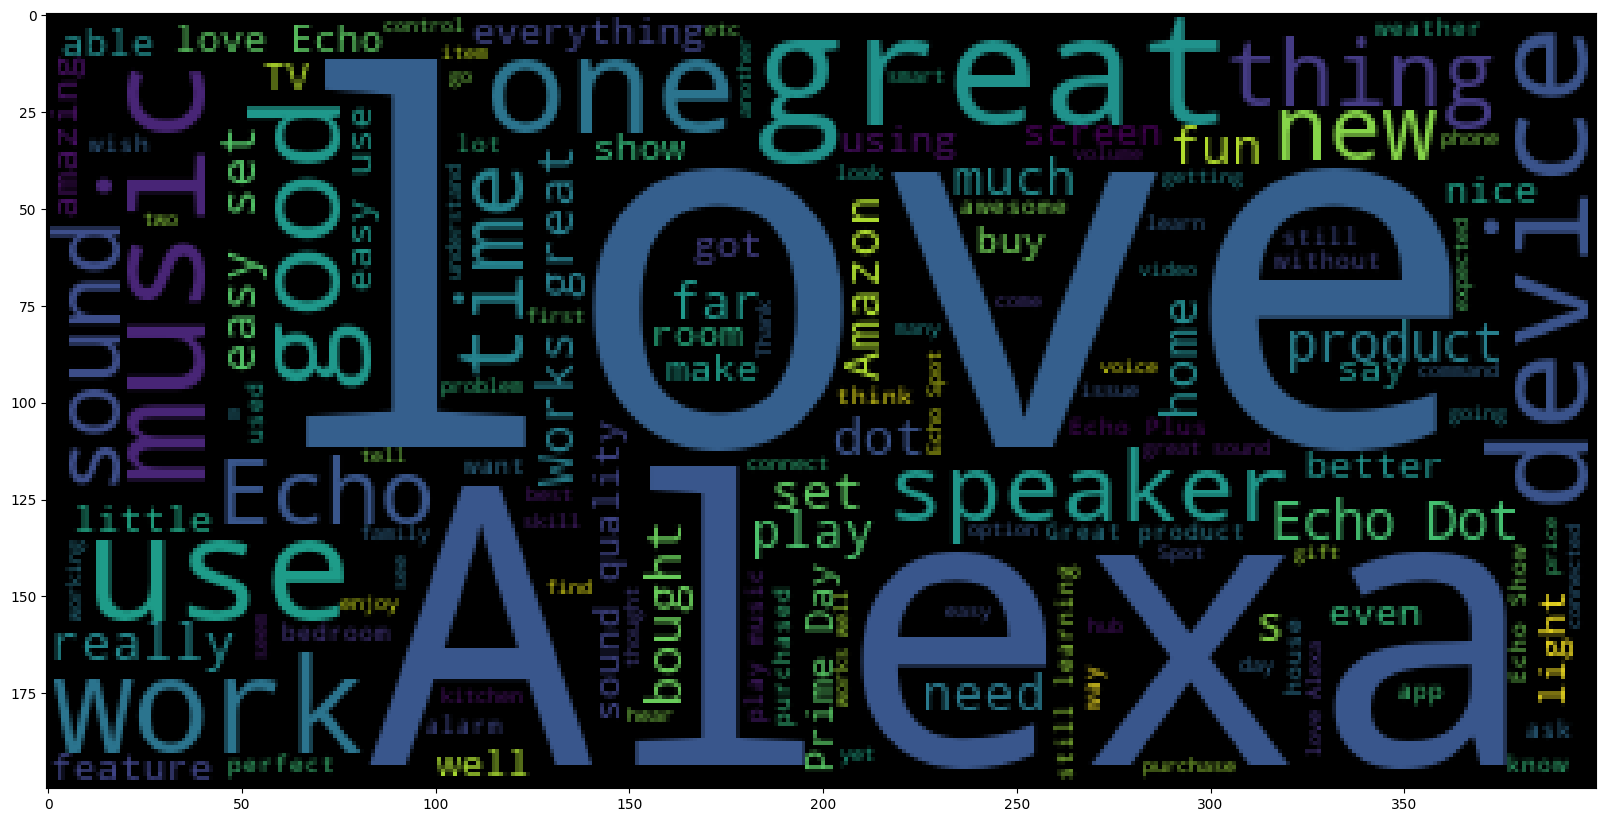

In [48]:
Positive_join = ' '.join(positive_clean)

plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(Positive_join))

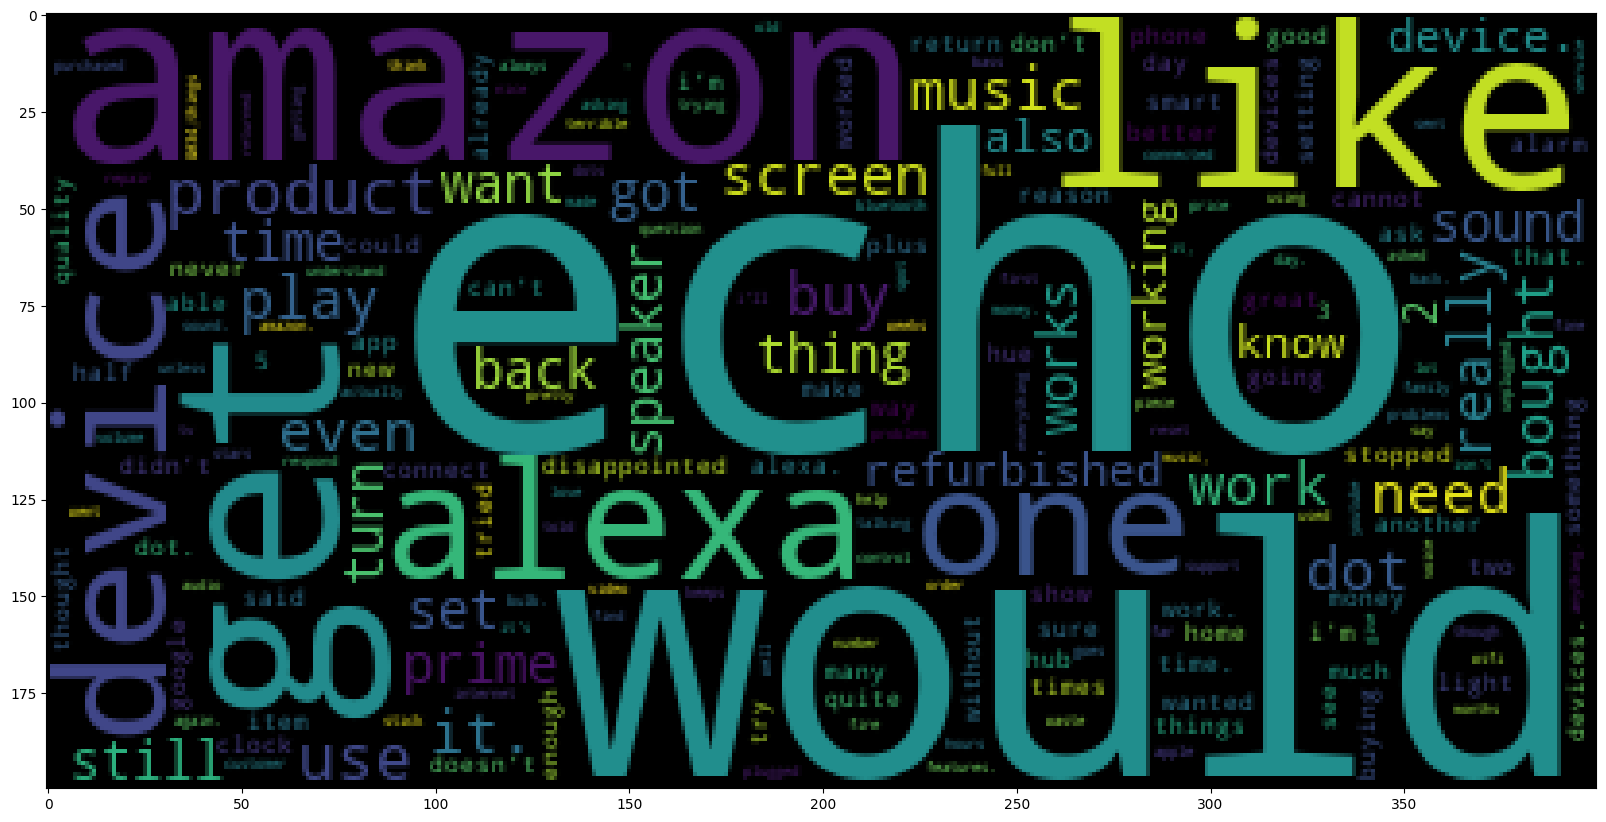

In [53]:
negative_clean_count = Counter(negative_clean)

plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate_from_frequencies(negative_clean_count))

In [62]:
#PERFORM DATA CLEANING

def message_cleaning(message):
    Test_punc_removed = [char for char in message if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)
    Test_punc_removed_join_clean = [word.lower() for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    return Test_punc_removed_join_clean

In [63]:
# Let's test the newly added function
reviews_df_clean = reviews_df['verified_reviews'].apply(message_cleaning)

In [64]:
# show the original review
print(reviews_df['verified_reviews'][5]) 

I received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do.


In [66]:
# show the cleaned up version
print(reviews_df_clean[5])

['received', 'echo', 'gift', 'needed', 'another', 'bluetooth', 'something', 'play', 'music', 'easily', 'accessible', 'found', 'smart', 'speaker', 'can’t', 'wait', 'see', 'else']


In [67]:
from sklearn.feature_extraction.text import CountVectorizer
# Define the cleaning pipeline we defined earlier
vectorizer = CountVectorizer(analyzer = message_cleaning)
reviews_countvectorizer = vectorizer.fit_transform(reviews_df['verified_reviews'])

In [68]:
from sklearn.feature_extraction.text import CountVectorizer
# Define the cleaning pipeline we defined earlier
vectorizer = CountVectorizer(analyzer = message_cleaning)
reviews_countvectorizer = vectorizer.fit_transform(reviews_df['verified_reviews'])

In [69]:
print(vectorizer.get_feature_names_out())

['072318' '1' '10' ... '😬' '😳' '🤓']


In [70]:
print(reviews_countvectorizer.toarray())  

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [72]:
reviews_countvectorizer.shape

(3150, 4488)

In [75]:
X = pd.DataFrame(reviews_countvectorizer.toarray())

In [77]:
y = reviews_df['feedback']
y

0       1
1       1
2       1
3       1
4       1
       ..
3145    1
3146    1
3147    1
3148    1
3149    1
Name: feedback, Length: 3150, dtype: int64

In [79]:
#TRAIN AND TEST AI/ML MODELS

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [80]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB()

In [82]:
from sklearn.metrics import classification_report, confusion_matrix

<Axes: >

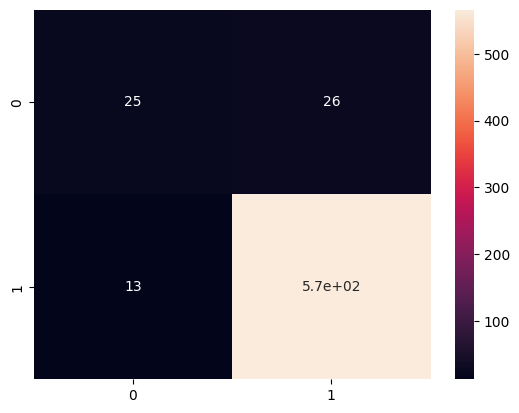

In [83]:
# Predicting the Test set results
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [84]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.66      0.49      0.56        51
           1       0.96      0.98      0.97       579

    accuracy                           0.94       630
   macro avg       0.81      0.73      0.76       630
weighted avg       0.93      0.94      0.93       630



              precision    recall  f1-score   support

           0       0.72      0.35      0.47        51
           1       0.95      0.99      0.97       579

    accuracy                           0.94       630
   macro avg       0.83      0.67      0.72       630
weighted avg       0.93      0.94      0.93       630



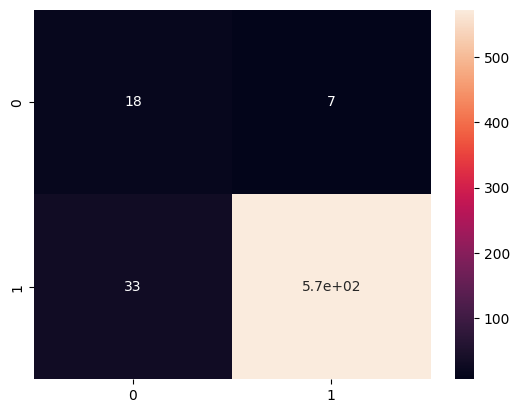

In [85]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot = True)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.18      0.28        51
           1       0.93      0.99      0.96       579

    accuracy                           0.93       630
   macro avg       0.81      0.58      0.62       630
weighted avg       0.91      0.93      0.91       630



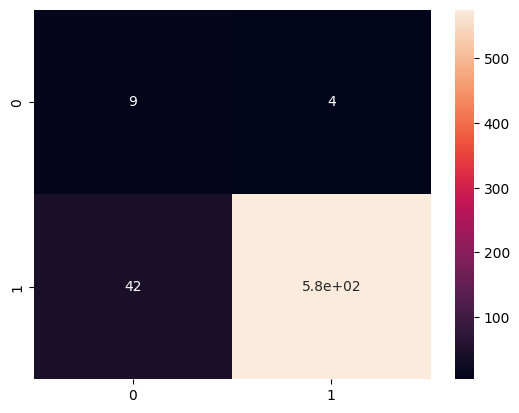

In [86]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot = True)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.29      0.42        51
           1       0.94      0.99      0.97       579

    accuracy                           0.93       630
   macro avg       0.85      0.64      0.69       630
weighted avg       0.93      0.93      0.92       630



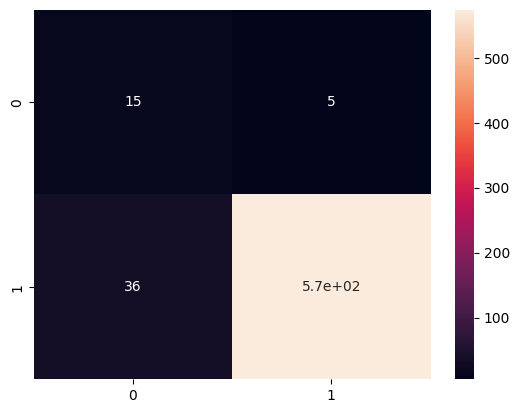

In [87]:
import xgboost as xgb

model = xgb.XGBClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot = True)

print(classification_report(y_test, y_pred))

# Hurray! Mission Accomplished!